El PCA es una técnica popular para reducción de dimensionalidad. Para decidir cuántos componentes retener, se utiliza el codo de la varianza explicada, que muestra la proporción de la varianza total que es capturada por cada componente principal.

En lugar de elegir el número de componentes arbitrariamente, puedes fijarte en la varianza explicada acumulada y buscar el punto donde ya no se agrega mucha varianza al incluir más componentes. Normalmente, se busca un umbral de varianza explicada (por ejemplo, 80-90%) y se retienen los componentes necesarios para alcanzar ese umbral.

```
(Jolliffe, I. T. (2002). Principal Component Analysis (Springer Series in Statistics).

Este es uno de los libros más conocidos sobre PCA. Jolliffe discute cómo la varianza explicada acumulada se usa para determinar cuántos componentes principales retener para capturar una proporción significativa de la varianza de los datos.)
```

 el objetivo principal de PCA es reducir la dimensionalidad de un conjunto de datos, preservando la mayor cantidad posible de "variabilidad". Esta variabilidad se cuantifica mediante la proporción de varianza total que cada componente principal explica

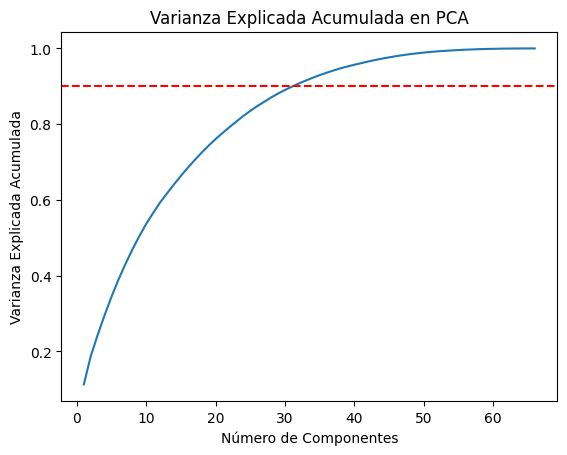

Se retendrán 32 componentes para explicar el 90% de la varianza.


In [8]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar el archivo de datos
df = pd.read_excel('preprocesado/datos_dauco_solo.xlsx')

# Aplicar PCA para reducir la dimensionalidad 
X = df.drop(columns=['MenorID']).values # Eliminamos la columna 'MenorID' que no es relevante para PCA

# Normalizar los datos (opcional pero recomendado para PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
pca.fit(X_scaled)

# Graficar la varianza explicada acumulada para decidir cuántos componentes mantener
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada en PCA')
plt.axhline(y=0.90, color='r', linestyle='--')  # Línea para ver el umbral del 90%
plt.show()

# Elegir el número de componentes para explicar el 90% de la varianza
components_to_retain = next(i for i, v in enumerate(cumulative_variance) if v >= 0.90) + 1
print(f"Se retendrán {components_to_retain} componentes para explicar el 90% de la varianza.")


Normalización: Se normalizan los datos antes de aplicar PCA, ya que es una buena práctica para que las variables con diferentes escalas no influyan más que otras.

K-means: Aplicamos K-means a los datos reducidos, con un número inicial de clusters k=5.

   MenorID  A102  A105  A132  A140  A142  A32  A325  A326  A68  ...  S37  S42  \
0       96     1     1     1     1     1    1     1     1    1  ...    1    1   
1      120     1     1     1     1     1    1     1     1    1  ...    1    1   
2      126     1     1     1     1     1    1     1     1    1  ...    1    1   
3      182     1     1     1     1     1    1     1     1    1  ...    1    1   
4      331     1     0     1     1     1    1     1     1    1  ...    0    1   

   S5  S6  S74  S76  S79  S9  S91  Cluster  
0   1   1    1    1    1   1    1        3  
1   1   1    1    1    1   1    1        1  
2   1   1    1    1    1   1    1        1  
3   1   1    1    1    1   1    1        1  
4   1   1    1    1    1   1    1        3  

[5 rows x 68 columns]


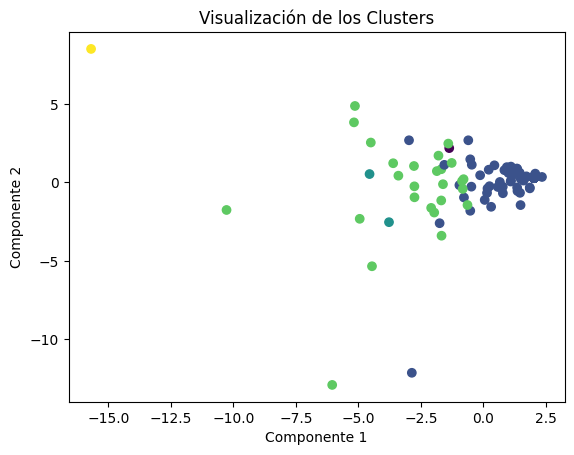

In [9]:
# Reducir la dimensionalidad a los componentes seleccionados
pca = PCA(n_components=components_to_retain)
X_reduced = pca.fit_transform(X_scaled)

# Aplicar K-means para agrupar los datos
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=1234)  # Puedes probar con diferentes valores de k
kmeans.fit(X_reduced)

# Añadir las etiquetas de los clusters al DataFrame original
df['Cluster'] = kmeans.labels_

# Guardar el DataFrame con la columna 'Cluster' en un archivo Excel
# df.to_excel(f'clusters/{num_clusters}_clusters_{components_to_retain}_components.xlsx', index=False)

# Mostrar las primeras filas para verificar
print(df.head())

# Visualizar los primeros dos componentes para observar los clusters
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Visualización de los Clusters')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

Método del Codo

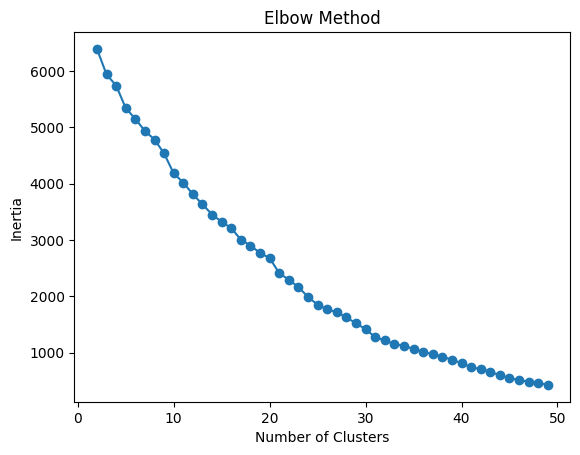

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Aplicar K-means para diferentes valores de k
inertia = []
k_range = range(2, 50)  # Probar entre 1 y 10 clusters (puedes ajustarlo)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1324)
    kmeans.fit(X_reduced)  # Utiliza los datos reducidos por PCA
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


Método de la silueta

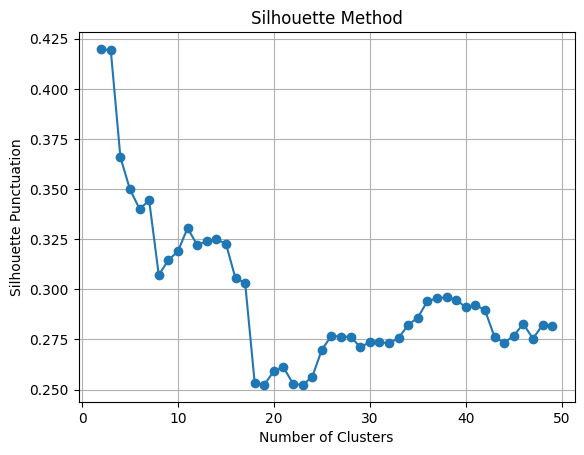

El número óptimo de clusters según el método de la silueta es 2 con 0.41993452683667215


In [10]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 50)  # Comenzamos desde 2 clusters, ya que para 1 no tiene sentido

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_reduced)
    score = silhouette_score(X_reduced, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar los resultados de la silueta
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Punctuation')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

# Imprimir el número de clusters que da la mejor puntuación
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f'El número óptimo de clusters según el método de la silueta es {best_k} con {max(silhouette_scores)}')


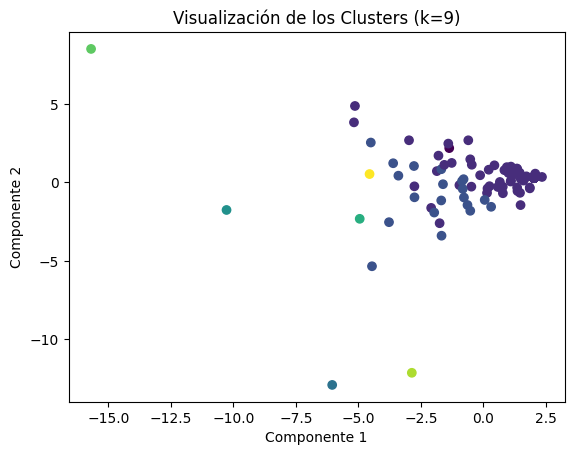

   MenorID  A102  A105  A132  A140  A142  A32  A325  A326  A68  ...  S37  S42  \
0       96     1     1     1     1     1    1     1     1    1  ...    1    1   
1      120     1     1     1     1     1    1     1     1    1  ...    1    1   
2      126     1     1     1     1     1    1     1     1    1  ...    1    1   
3      182     1     1     1     1     1    1     1     1    1  ...    1    1   
4      331     1     0     1     1     1    1     1     1    1  ...    0    1   

   S5  S6  S74  S76  S79  S9  S91  Cluster  
0   1   1    1    1    1   1    1        1  
1   1   1    1    1    1   1    1        1  
2   1   1    1    1    1   1    1        1  
3   1   1    1    1    1   1    1        2  
4   1   1    1    1    1   1    1        1  

[5 rows x 68 columns]


In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar K-means con 2 clusters
num_clusters = 9
seed = [1234, 5678, 91011,49114865, 123456789, 1234567890, 1234567891, 1234567892, 1234567893, 1234567894]

kmeans = KMeans(n_clusters=num_clusters, random_state=seed[0])
kmeans.fit(X_reduced)  # Utilizamos los datos reducidos por PCA

# Añadir las etiquetas de los clusters al DataFrame original
df['Cluster'] = kmeans.labels_


# Visualizar los dos primeros componentes para ver la separación de los clusters
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title(f'Visualización de los Clusters (k={num_clusters})')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

# Mostrar algunas filas del DataFrame con los clusters asignados
print(df.head())


# NMI (Normalized Mutual Information) y ARI (Adjusted Rand Index)
Métricas de comparación de clusters. Ayudan a evaluar la estabilidad y consistencia de los clusters cuando cambia la semilla.
ARI:
    Qué mide: Qué tan similares son dos asignaciones de clusters, corrigiendo por azar.

    Rango:

    ARI = 1.0 → Las dos particiones son idénticas.
    ARI ≈ 0.0 → Lo que se esperaría por azar.
    ARI < 0 → Peor que el azar (muy raro, suele indicar problemas).
    Ventaja: Tiene en cuenta los falsos positivos y falsos negativos, ideal cuando las etiquetas de los clusters no coinciden en número o nombres.

NMI:
    Qué mide: La cantidad de información compartida entre dos particiones, normalizada para que el valor esté entre 0 y 1.

    Rango:

    NMI = 1.0 → Clusters idénticos.
    NMI = 0.0 → Clusters completamente independientes (sin información en común).
    Ventaja: Es simétrica y no depende del número exacto de clusters.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import openpyxl
from openpyxl.styles import PatternFill
from itertools import combinations
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


# Suponiendo que 'cluster_column' es el nombre de la columna que contiene los números de los clusters
# Aquí debes asegurarte de que el DataFrame 'df' contiene esa columna antes de guardar

# Guardamos aquí los labels para comparar luego
labels_dict = {}

colors = {
    0: "FFFF99", 1: "FFCC99", 2: "99CCFF", 3: "CCFF99", 4: "FF99CC",
    5: "FF6666", 6: "66FF66", 7: "6666FF", 8: "FF66FF"
}


for s in seed:
    kmeans = KMeans(n_clusters=num_clusters, random_state=s, n_init=50)
    kmeans.fit(X_reduced)
    df['Cluster'] = kmeans.labels_

    # Guardar etiquetas para comparación
    labels_dict[s] = kmeans.labels_

    # Plot opcional
    # plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, cmap='viridis')
    # plt.title(f'Visualización de los Clusters (k={num_clusters}, seed={s})')
    # plt.xlabel('Componente 1')
    # plt.ylabel('Componente 2')
    # plt.show()

    silhouette = silhouette_score(X_reduced, kmeans.labels_)
    print(f"Silhouette Score [{s}]: {silhouette:.3f}")
    
    
    davies_bouldin = davies_bouldin_score(X_reduced, kmeans.labels_)
    print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")

    calinski_harabasz = calinski_harabasz_score(X_reduced, kmeans.labels_)
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")

    # Guardar DataFrame en Excel
    base_path = f'clusters/datos_dauco_variables_con_clusters_{num_clusters}_{s}_.xlsx'
    df.to_excel(base_path, index=False)

    # Colorear Excel
    wb = openpyxl.load_workbook(base_path)
    ws = wb.active
    cluster_col_idx = df.columns.get_loc('Cluster') + 1

    for row in ws.iter_rows(min_row=2, max_row=ws.max_row):
        cluster_val = row[cluster_col_idx - 1].value
        fill_color = colors.get(cluster_val, "FFFFFF")
        fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type="solid")
        for cell in row:
            cell.fill = fill

    wb.save(f'clusters/datos_dauco_variables_con_clusters_coloreados_{num_clusters}_{s}_.xlsx')

# 📊 Evaluar estabilidad entre seeds
print("\nEvaluación de estabilidad entre ejecuciones:\n")
for s1, s2 in combinations(seed, 2):
    ari = adjusted_rand_score(labels_dict[s1], labels_dict[s2])
    nmi = normalized_mutual_info_score(labels_dict[s1], labels_dict[s2])
    print(f"Seeds {s1} vs {s2} --> ARI: {ari:.3f}, NMI: {nmi:.3f}")


Silhouette Score [1234]: 0.287
Silhouette Score [5678]: 0.333
Silhouette Score [91011]: 0.349
Silhouette Score [49114865]: 0.358
Silhouette Score [123456789]: 0.240
Silhouette Score [1234567890]: 0.369
Silhouette Score [1234567891]: 0.345
Silhouette Score [1234567892]: 0.309
Silhouette Score [1234567893]: 0.315
Silhouette Score [1234567894]: 0.320

Evaluación de estabilidad entre ejecuciones:

Seeds 1234 vs 5678 --> ARI: 0.778, NMI: 0.754
Seeds 1234 vs 91011 --> ARI: 0.545, NMI: 0.532
Seeds 1234 vs 49114865 --> ARI: 0.426, NMI: 0.510
Seeds 1234 vs 123456789 --> ARI: 0.539, NMI: 0.550
Seeds 1234 vs 1234567890 --> ARI: 0.381, NMI: 0.529
Seeds 1234 vs 1234567891 --> ARI: 0.527, NMI: 0.588
Seeds 1234 vs 1234567892 --> ARI: 0.668, NMI: 0.627
Seeds 1234 vs 1234567893 --> ARI: 0.450, NMI: 0.529
Seeds 1234 vs 1234567894 --> ARI: 0.630, NMI: 0.631
Seeds 5678 vs 91011 --> ARI: 0.710, NMI: 0.625
Seeds 5678 vs 49114865 --> ARI: 0.517, NMI: 0.561
Seeds 5678 vs 123456789 --> ARI: 0.536, NMI: 0.530
S

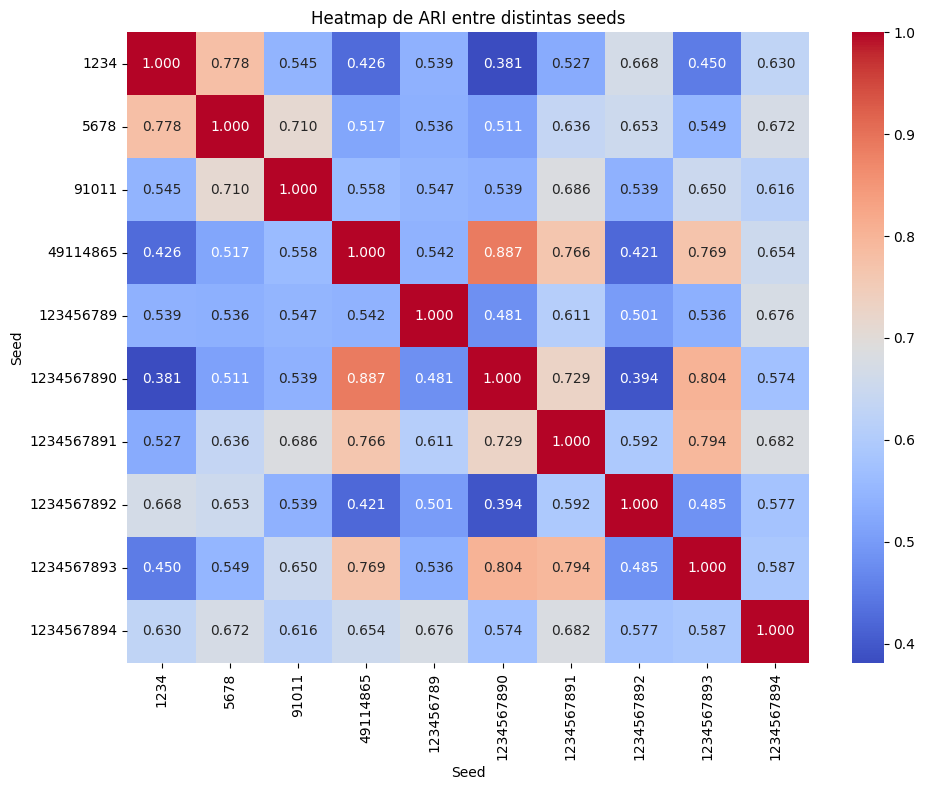

In [33]:
import seaborn as sns
# Crear un DataFrame con los valores de ARI entre combinaciones de semillas
seeds = list(labels_dict.keys())
ari_matrix = pd.DataFrame(index=seeds, columns=seeds, dtype=float)

# Rellenar la matriz de ARI
for s1, s2 in combinations(seeds, 2):
    ari = adjusted_rand_score(labels_dict[s1], labels_dict[s2])
    ari_matrix.loc[s1, s2] = ari
    ari_matrix.loc[s2, s1] = ari

# Diagonal con valor 1.0 (misma semilla)
np.fill_diagonal(ari_matrix.values, 1.0)

# Crear heatmap de ARI
plt.figure(figsize=(10, 8))
sns.heatmap(ari_matrix, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Heatmap de ARI entre distintas seeds")
plt.xlabel("Seed")
plt.ylabel("Seed")
plt.tight_layout()
plt.show()


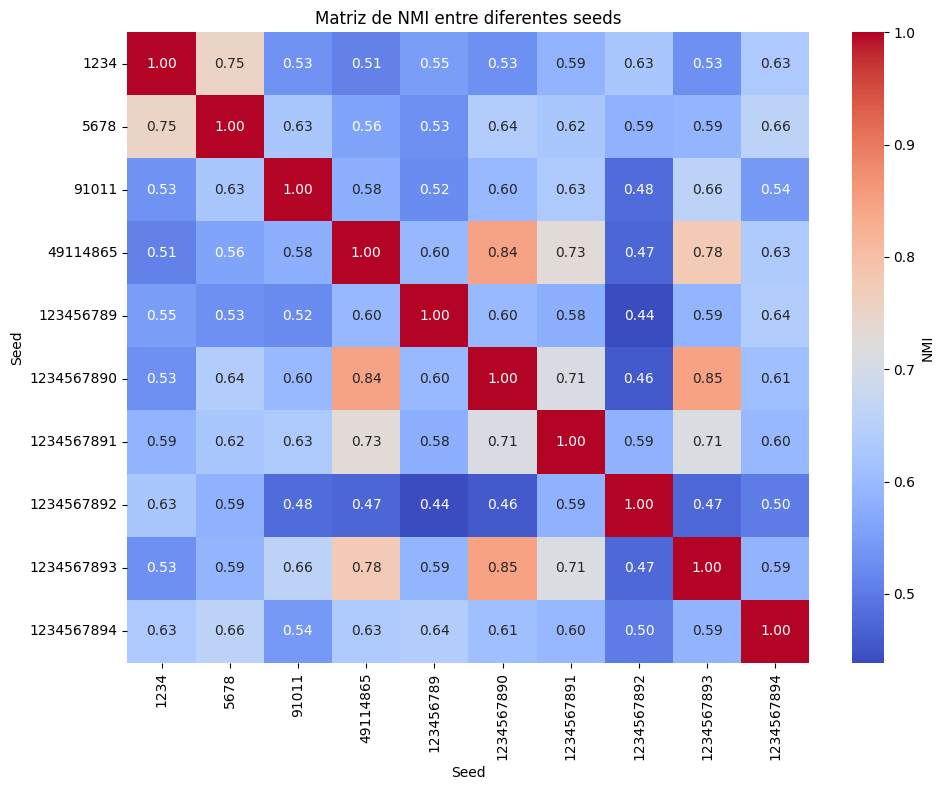

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import normalized_mutual_info_score

# Usar las etiquetas previamente almacenadas en labels_dict
seeds = list(labels_dict.keys())
n_seeds = len(seeds)

# Crear matriz de NMI
nmi_matrix = np.zeros((n_seeds, n_seeds))

for i in range(n_seeds):
    for j in range(n_seeds):
        nmi_matrix[i, j] = normalized_mutual_info_score(labels_dict[seeds[i]], labels_dict[seeds[j]])

# Crear un DataFrame para el heatmap
nmi_df = pd.DataFrame(nmi_matrix, index=seeds, columns=seeds)

# Dibujar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(nmi_df, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'NMI'})
plt.title("Matriz de NMI entre diferentes seeds")
plt.xlabel("Seed")
plt.ylabel("Seed")
plt.tight_layout()
plt.show()
